In [31]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

R_scan_05 = pd.read_csv('./spectrum/LENS/rev2/R_5_B.csv')['SCAN'].values
R_scan_15 = pd.read_csv('./spectrum/LENS/rev2/R_15_B.csv')['SCAN'].values
R_scan_30 = pd.read_csv('./spectrum/LENS/rev2/R_30_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

air = ml.Non_Dispersion(1)
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
HOC = ml.open_material('OC_HRI_LENS', 'Material')
sodalime = ml.open_material('sodalime', 'Material')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

R_hypo_05 = lambda th: tm.Design(
    [air,SiN, HOC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 4)

R_hypo_15 = lambda th: tm.Design(
    [air, SiO2,  SiN,HOC, ITO,  SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 15)

R_hypo_30 = lambda th: tm.Design(
    [air,SiO2,  SiN,  HOC,ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 32)

fom = lambda th:sum(
    abs(R_hypo_05(th)-R_scan_05/100)
)+sum(
    abs(R_hypo_15(th)-R_scan_15/100)
)+sum(
    abs(R_hypo_30(th)-R_scan_30/100)
)

def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

In [32]:
sol = differential_evolution(
    fom, [
        (0,100),(0,100),(1500,2500),(20,40),(0,100),(0,100)
    ], disp = True, polish = False, popsize = 25, mutation = 0.5, recombination = 0.9, strategy = 'rand1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 28.9855
differential_evolution step 2: f(x)= 27.6001
differential_evolution step 3: f(x)= 25.8987
differential_evolution step 4: f(x)= 25.8987
differential_evolution step 5: f(x)= 24.9577
differential_evolution step 6: f(x)= 18.7184
differential_evolution step 7: f(x)= 18.7184
differential_evolution step 8: f(x)= 18.7184
differential_evolution step 9: f(x)= 18.7184
differential_evolution step 10: f(x)= 17.4495
differential_evolution step 11: f(x)= 17.4495
differential_evolution step 12: f(x)= 15.427
differential_evolution step 13: f(x)= 15.427
differential_evolution step 14: f(x)= 15.427
differential_evolution step 15: f(x)= 15.427
differential_evolution step 16: f(x)= 15.427
differential_evolution step 17: f(x)= 15.427
differential_evolution step 18: f(x)= 15.427
differential_evolution step 19: f(x)= 15.1737
differential_evolution step 20: f(x)= 13.4236
differential_evolution step 21: f(x)= 13.4236
differential_evolution step 22: f(x)= 13.4236
diff

0.28744548822124716


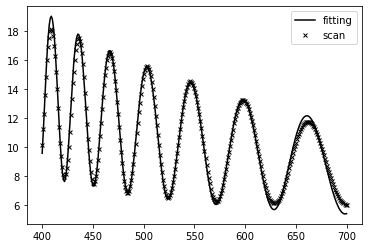

0.22181130767811408


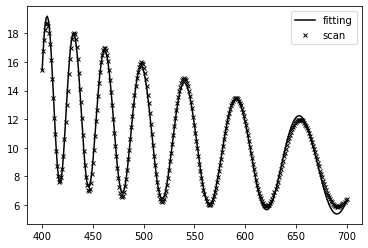

0.25509862820565166


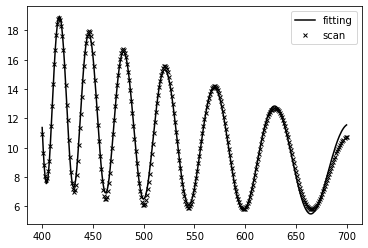

In [30]:
m1 = [27.55518851,9.28833535,1824.14320373,31.18399857,32.39091331,9.02913602]
m2 = [27.17950045,7.39887361,1826.56677394,31.30352211,32.65563086,8.97598438]
tk = m2

plt.plot(wl, 100*R_hypo_05(tk),'-k', label = 'fitting')
plt.plot(wl, R_scan_05, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev2_reflection_blacktap_05.png')
print(RMSE(100*R_hypo_05(tk),R_scan_05, 301))
plt.show()

plt.plot(wl, 100*R_hypo_15(tk),'-k', label = 'fitting')
plt.plot(wl, R_scan_15, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
print(RMSE(100*R_hypo_15(tk),R_scan_15, 301))
plt.show()

plt.plot(wl, 100*R_hypo_30(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_30, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
print(RMSE(100*R_hypo_30(tk),R_scan_30, 301))
plt.show()


